#  第二讲 复杂网络的统计特征二

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

In [2]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 实验环境：
### Python版本==3.9.16
### 依赖的第三方库：networkx==3.0, matplotlib==3.6.3, numpy==1.24.2, pandas==1.5.3, openpyxl==3.1.1

### 富人俱乐部系数

In [3]:
G = nx.barabasi_albert_graph(100, 3)
nx.rich_club_coefficient(G, normalized=True)

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 0.9631578947368421,
 4: 0.9230769230769231,
 5: 0.8953488372093024,
 6: 0.8676470588235294,
 7: 0.8392857142857143,
 8: 0.95,
 9: 0.9705882352941176,
 10: 0.9130434782608696,
 11: 0.8947368421052632,
 12: 0.8947368421052632,
 13: 0.8461538461538461,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 0.8571428571428572,
 18: 0.7999999999999999,
 19: 1.0,
 20: 1.0,
 21: 1.0}

[[6, 7, 4], [5, 8, 7], [2, 5, 7, 4, 3, 1]]


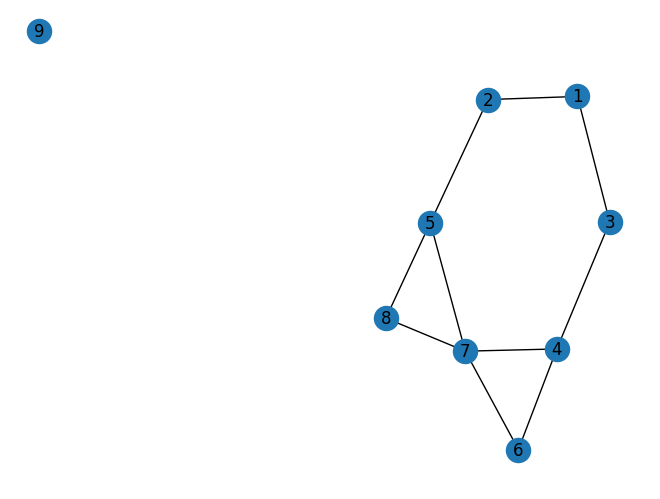

In [4]:
# 路径和循环（或圈）
G = nx.Graph([(1,2),(1,3),(2,5),(3,4),(4,6),(4,7),(5,7),(5,8),(6,7),(7,8)])
G.add_nodes_from(list(range(1,10)))
nx.draw(G, with_labels=True)

print(nx.cycle_basis(G))

## 加权网络的静态特征

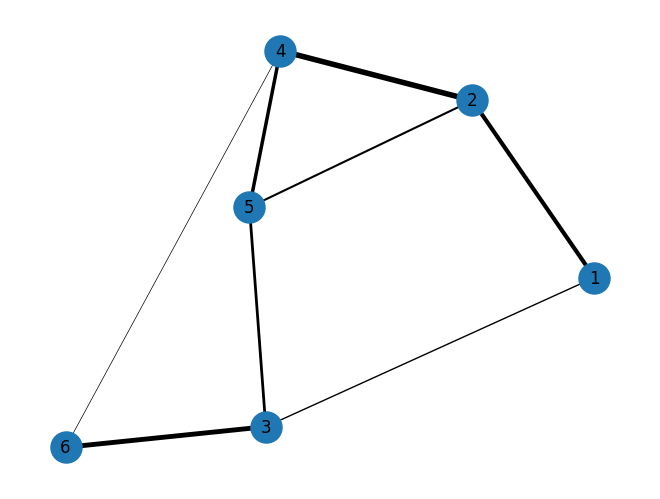

In [5]:
# 创建一个无向加权网络
WG = nx.Graph()
WG.add_nodes_from([1,2,3,4,5,6])
WG.add_weighted_edges_from([(1,2,3),(1,3,1),(2,4,4),(2,5,1.5),(3,5,2),(3,6,3.5),(4,5,2.5),(4,6,0.5)])
w = [WG[e[0]][e[1]]['weight'] for e in WG.edges()]
nx.draw(WG,node_size=500,width=w,with_labels=True)

In [6]:
# 获取网络节点的加权度（即点权）
nx.degree(WG, weight='weight')

DegreeView({1: 4, 2: 8.5, 3: 6.5, 4: 7.0, 5: 6.0, 6: 4.0})

In [7]:
# 获取每条边的权重
for e in WG.edges():
    print(WG[e[0]][e[1]]['weight'])

3
1
4
1.5
2
3.5
2.5
0.5


In [8]:
# 无权集聚系数
nx.clustering(WG)

{1: 0,
 2: 0.3333333333333333,
 3: 0,
 4: 0.3333333333333333,
 5: 0.3333333333333333,
 6: 0}

### 加权集聚系数
## $C_{o, i}^\omega=\frac{1}{k_i\left(k_i-1\right)} \sum_{j, k}\left(w_{i j}^{\prime} w_{j k}^{\prime} w_{k i}^{\prime}\right)^{\frac{1}{3}}$

In [9]:
nx.clustering(WG, weight='weight')

{1: 0,
 2: 0.20551767286087252,
 3: 0,
 4: 0.20551767286087252,
 5: 0.20551767286087252,
 6: 0}

## 几种常用的中心性指标

In [10]:
# 分别生成ER和BA无标度网络，节点数设定为N=100
GER = nx.erdos_renyi_graph(100,0.08)
GBA = nx.barabasi_albert_graph(100,4)

In [11]:
# 度中心性
dc1 = nx.degree_centrality(GER) 
dc2 = nx.degree_centrality(GBA) 
# 介数中心性
bc1 = nx.betweenness_centrality(GER)
bc2 = nx.betweenness_centrality(GBA)
# 接近度中心性
cc1 = nx.closeness_centrality(GER)
cc2 = nx.closeness_centrality(GBA)
# 特征向量中心性
ec1 = nx.eigenvector_centrality(GER)
ec2 = nx.eigenvector_centrality(GBA)

Text(0.5, 1.0, 'eigenvector_centrality')

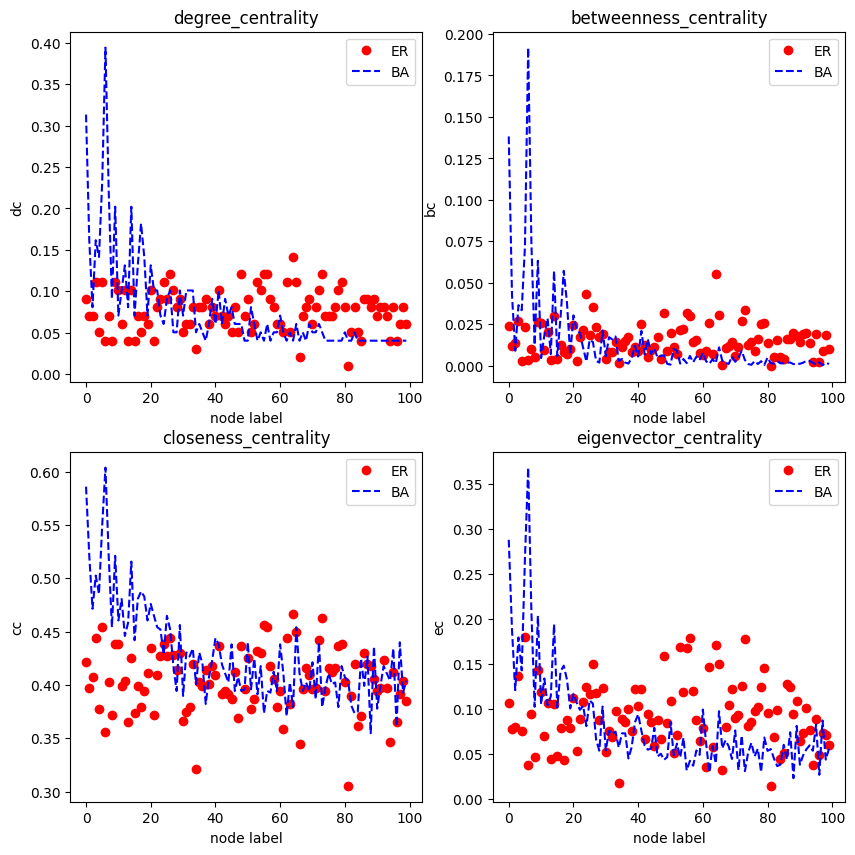

In [12]:
# 绘图比较
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(dc1.keys(), dc1.values(), 'ro', label='ER')
plt.plot(dc2.keys(), dc2.values(), 'b--', label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("dc")
plt.title("degree_centrality")

plt.subplot(222)
plt.plot(bc1.keys(), bc1.values(), 'ro', label='ER')
plt.plot(bc2.keys(), bc2.values(), 'b--', label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("bc")
plt.title("betweenness_centrality")

plt.subplot(223)
plt.plot(cc1.keys(), cc1.values(), 'ro', label='ER')
plt.plot(cc2.keys(), cc2.values(), 'b--', label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("cc")
plt.title("closeness_centrality")

plt.subplot(224)
plt.plot(ec1.keys(), ec1.values(), 'ro', label='ER')
plt.plot(ec2.keys(), ec2.values(), 'b--', label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("ec")
plt.title("eigenvector_centrality")

## 度-度相关性

### 1. 基于最近邻平均度值的度-度相关性

In [19]:
# 加载三个真实数据集
# 1. 科学合作网络
df1 = pd.read_excel("citation.xlsx")
G1 = nx.from_pandas_edgelist(df1, 'source', 'target', create_using = nx.Graph())
# 2. 电网
df2 = pd.read_excel("power.xlsx")
G2 = nx.from_pandas_edgelist(df2, 'source', 'target', create_using = nx.Graph())
# 3. 代谢网络
df3 = pd.read_excel("celegans_metabolic.xlsx")
G3 = nx.from_pandas_edgelist(df3, 'source', 'target', create_using = nx.Graph())

In [20]:
# 定义求最近邻平均度的函数
def average_nearest_neighbor_degree(G):
    k = set([G.degree(i) for i in G.nodes()])  # 获取所有可能的度值
    sorted_k = sorted(k)
    knni = nx.average_neighbor_degree(G)
    
    k_nn_k = []
    for ki in sorted_k:
        if ki == 0:
            k_nn_k.append(0.0)   
        else:
            c = 0
            s = 0
            for i in G.nodes():
                if G.degree(i) == ki:  
                    s += knni[i]
                    c += 1
            k_nn_k.append(s/c)     
    
    return sorted_k, k_nn_k

In [21]:
x1, y1 = average_nearest_neighbor_degree(G1)
x2, y2 = average_nearest_neighbor_degree(G2)
x3, y3 = average_nearest_neighbor_degree(G3)

### 2. 基于Pearson相关系数的度-度相关性

In [24]:
r1 = nx.degree_assortativity_coefficient(G1)
r2 = nx.degree_assortativity_coefficient(G2)
r3 = nx.degree_assortativity_coefficient(G3)
print(r1)
print(r2)
print(r3)

0.13506886900042142
0.0034569877442048825
-0.219662309363656


In [25]:
r1 = nx.degree_pearson_correlation_coefficient(G1)
r2 = nx.degree_pearson_correlation_coefficient(G2)
r3 = nx.degree_pearson_correlation_coefficient(G3)
print(r1)
print(r2)
print(r3)

0.13506886900042697
0.0034569877442049077
-0.21966230936365552


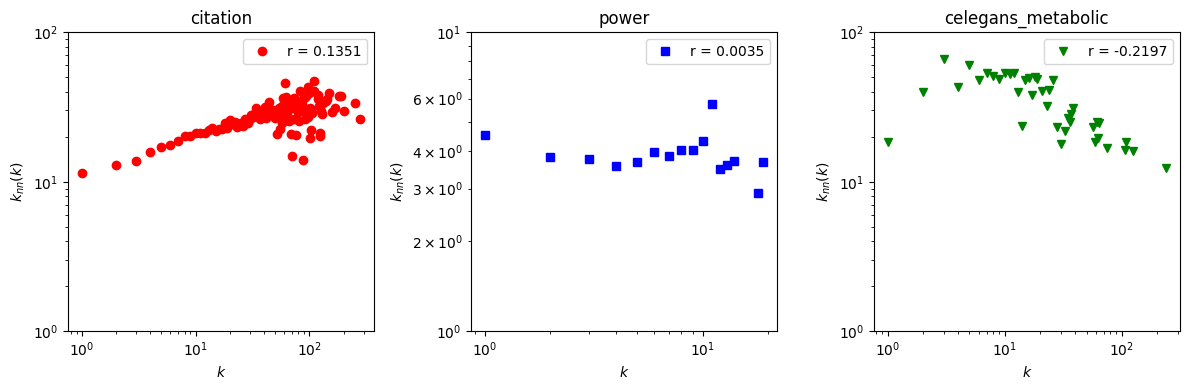

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(x1, y1, 'ro', label='r = '+'%.4f'%r1)
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$k_{nn}(k)$")
plt.xscale("log")
plt.yscale("log")
plt.title('citation')
plt.ylim([1,100])

plt.subplot(132)
plt.plot(x2, y2, 'bs', label='r = '+'%.4f'%r2)
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$k_{nn}(k)$")
plt.xscale("log")
plt.yscale("log")
plt.title('power')
plt.ylim([1,10])

plt.subplot(133)
plt.plot(x3, y3, 'gv', label='r = '+'%.4f'%r3)
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$k_{nn}(k)$")
plt.xscale("log")
plt.yscale("log")
plt.title('celegans_metabolic')
plt.ylim([1,100])

plt.tight_layout()